In [1]:
from sympy import *
# x= -1.038
# y = 3**2



In [3]:
x=Symbol('x')
a=(x-(6*x)/(x+2))/((x-4)/(x+2))
a


(x + 2)*(x - 6*x/(x + 2))/(x - 4)

In [4]:
expr= simplify(a)
print(expr)

NameError: name 'symplify' is not defined

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

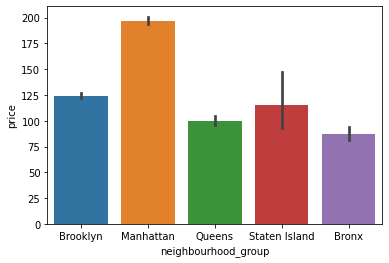

In [6]:
sns.barplot(x='neighbourhood_group', y='price', data = df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
df1 = df[ (df['price'] > df['price'].mean() -3*df['price'].std()) & (df['price'] < df['price'].mean() + 3*df['price'].std())]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48507 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48507 non-null  int64  
 1   name                            48491 non-null  object 
 2   host_id                         48507 non-null  int64  
 3   host_name                       48486 non-null  object 
 4   neighbourhood_group             48507 non-null  object 
 5   neighbourhood                   48507 non-null  object 
 6   latitude                        48507 non-null  float64
 7   longitude                       48507 non-null  float64
 8   room_type                       48507 non-null  object 
 9   price                           48507 non-null  int64  
 10  minimum_nights                  48507 non-null  int64  
 11  number_of_reviews               48507 non-null  int64  
 12  last_review                     

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

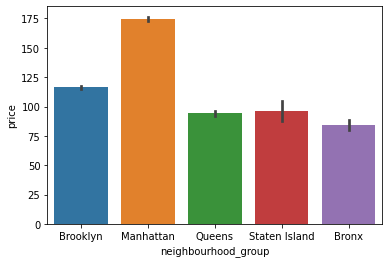

In [23]:
sns.barplot(x='neighbourhood_group', y='price', data = df1)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

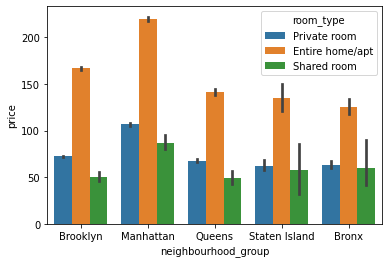

In [24]:
sns.barplot(x='neighbourhood_group', y='price', data = df1, hue='room_type')

In [19]:
df.groupby(['neighbourhood_group'])['price'].agg(['mean', 'max', 'min','median'])

mean    max  min  median
neighbourhood_group                                
Bronx                 87.496792   2500    0      65
Brooklyn             124.383207  10000    0      90
Manhattan            196.875814  10000    0     150
Queens                99.517649  10000   10      75
Staten Island        114.812332   5000   13      75

In [27]:
df1['stay'] = df1['minimum_nights'].apply(lambda x : 'long stay' if x>10 else 'short stay')
df1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

         stay  
0  short stay  
1  short stay  
2  short stay  
3  short stay  
4  short stay

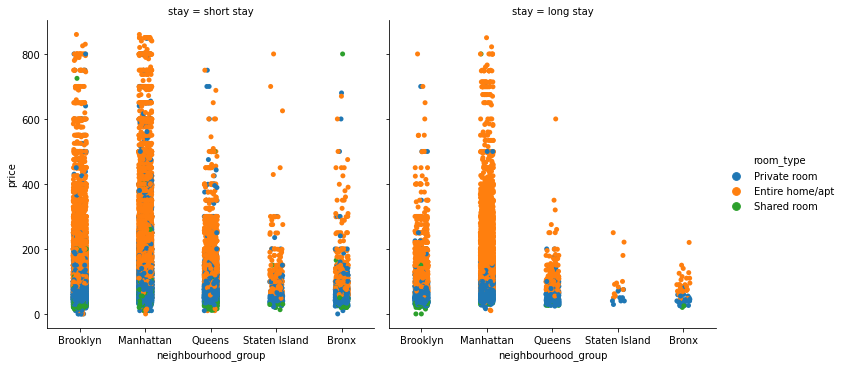

In [28]:
sns.catplot(x='neighbourhood_group', y='price', data = df1, hue='room_type', col = 'stay')

In [ ]:
sns.catplot(x='neighbourhood_group', y='price', data = df1, hue='room_type', col = 'stay',kind = 'bar'),